In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [9]:
#%% Parametros Senoidal
a1 = np.sqrt(2) #Amplitud normalizada de la señal
nn = 1000       # Cantidad de muestras que tiene mi señal
rr = 200         # La cantidad de realizaciones que se hacen
fs=nn           # Igualo fs a nn para que deltaf =1 
Zpadding = 10      
df = fs/nn
Ts =  1 / fs    #   Me detengo en la mitad de la frecuencia de trabajo
W0 = fs / 4     #
snr = 10

###########Parametros de graficas de frecuencia
ff = np.linspace(0, (nn-1)*df, nn)
bfrec = ff <= fs/2
dfz = fs/Zpadding/nn
ffz = np.linspace(0, (Zpadding*nn-1)*dfz, Zpadding*nn)  # eje en frecuencia con zero padding
bfrecz = ffz <= fs/2 
#############

# fr = np.random.uniform(-1/2, 1/2, size = (1,rr))
fr = np.random.uniform(-1/2, 1/2, size = (1,rr))  # Genero la dispersión de frecuencias
W1 = W0 + fr    # cantidad de W1 igual a la cantidad de realizaciónes 
#W1 = W0 + 1/2


tt = np.arange(0, nn*Ts, Ts).reshape(nn,1)  # Defino el eje de tiempo para cada realización
tt2 = np.arange(0, 10*nn*Ts, Ts).reshape(10*nn,1) 

# Genero el ruido uniforme
Pn = 10**(-snr/10)
Vn = np.sqrt(Pn*12) 
Noise = np.random.uniform(-Vn/2, Vn/2, size = (nn,rr))


ttr =  tt * np.ones((nn,rr)) 
#Senoidal pura
xx = a1 * np.sin(W1*2*np.pi * ttr)

#Senoidal + Ruido
xr = xx + Noise

In [19]:
#%%
####Ventana
#####Boxcar - Ventana implicita####
wnBoxcar = sig.windows.boxcar(nn).reshape(nn,1) ##inicialmente decial 1 en vez de rr
XX_boxcar = xr * wnBoxcar
#Normalizo los valores de las señales con su ventana
#XX_boxcar = xxBox / np.sqrt(np.var(xxBox))  
#XX_boxcar = xxBox 
#####Flattop#####
wnFlattop = sig.windows.flattop(nn).reshape(nn,1) ##inicialmente decial 1 en vez de rr

#Normalizo los valores de las señales con su ventana
XX_flattop = xr * wnFlattop

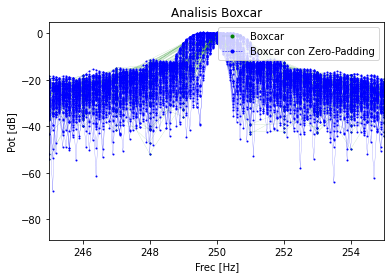

In [20]:
#####Zero padding - Analisis para Boxcar
Xz_Boxcar = np.vstack([XX_boxcar,np.zeros([(Zpadding-1)*nn,rr])])

#Grafico el espectro de las repeticiones con los ceros y diesmado. Debería coincidir en la frec central
plt.figure(1)
#Con Zero padding
fft_boxcar_zp   = np.fft.fft( Xz_Boxcar,    axis = 0 )/nn
dp_sig_bc_zp   = np.abs(fft_boxcar_zp[bfrecz])**2
dp_sig_bc_zp_dB = 10* np.log10(2*dp_sig_bc_zp)


#Sin Zero padding
fft_boxcar   = np.fft.fft( XX_boxcar,    axis = 0 )/nn
dp_sig_bc  = np.abs(fft_boxcar[bfrec])**2
dp_sig_bc_dB  = 10* np.log10(2*dp_sig_bc)

plt.title("Analisis Boxcar")
plt.xlabel("Frec [Hz]")
plt.ylabel("Pot [dB]")
plt.xlim(W0-5*df, W0+5*df)
plt.plot([],[], label="Boxcar", color = 'green', linestyle=':',  linewidth=.2,  marker='o', markersize=3)
plt.plot( ff[bfrec], dp_sig_bc_dB,  color = 'green',  linestyle=':',  linewidth=.2,  marker='o', markersize=1)
plt.plot([],[], label="Boxcar con Zero-Padding", color = 'blue', linestyle='--', linewidth=.5, marker='o', markersize=3)
plt.plot( ffz[bfrecz], dp_sig_bc_zp_dB,  color= 'blue', linestyle='--',  linewidth=.2,  marker='o', markersize=1)
plt.legend(loc='upper right')

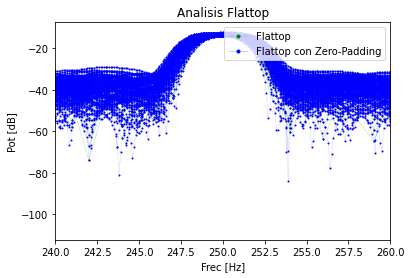

In [21]:
#Zero padding - Analisis para Flattop
Xz_Flattop = np.vstack([XX_flattop,np.zeros([(Zpadding-1)*nn,rr])])  # Zero padding

plt.figure(2)
#Con Zer padding
fft_flattop_zp   = np.fft.fft( Xz_Flattop,    axis = 0 )/nn
dp_sig_ft_zp   = np.abs(fft_flattop_zp[bfrecz])**2
dp_sig_ft_zp_dB = 10* np.log10(2*dp_sig_ft_zp)
#Sin Zero Padding
fft_flattop   = np.fft.fft( XX_flattop,    axis = 0 )/nn
dp_sig_ft  = np.abs(fft_flattop[bfrec])**2
dp_sig_ft_dB  = 10* np.log10(2*dp_sig_ft)


plt.title("Analisis Flattop")
plt.xlabel("Frec [Hz]")
plt.ylabel("Pot [dB]")
plt.xlim(W0-10*df, W0+10*df)
plt.plot([],[], label="Flattop", color = 'green', linestyle='--',  linewidth=.2,  marker='o', markersize=3)
plt.plot( ff[bfrec], dp_sig_ft_dB,  color = 'green',  linestyle='--',  linewidth=.2,  marker='o', markersize=1)
plt.plot([],[], label="Flattop con Zero-Padding", color = 'blue', linestyle=':', linewidth=.5, marker='o', markersize=3)
plt.plot( ffz[bfrecz], dp_sig_ft_zp_dB,  color= 'blue', linestyle=':',  linewidth=.2,  marker='o', markersize=1)
plt.legend(loc='upper right')

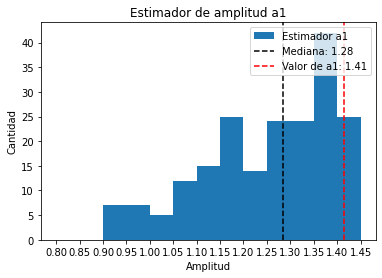

In [13]:
#%% Estimador de amplitud a1 Para Boxcar

a1_boxcar = np.abs(fft_boxcar[int(W0)])*2
a1_boxcar_db = 10* np.log(a1_boxcar**2/2)
mediana_a1_boxcar = np.median(a1_boxcar)
sesgo_a1_boxcar = mediana_a1_boxcar - a1
var_a1_boxcar = np.var(a1_boxcar)


plt.figure(3)
plt.title("Estimador de amplitud a1")
plt.xlabel("Amplitud")
plt.ylabel("Cantidad")
bins = np.arange(.8,1.5,.05 )
plt.hist(a1_boxcar,label= 'Estimador a1', bins=bins);
plt.xticks(bins)
plt.xticks(bins)
plt.axvline(mediana_a1_boxcar, color='black', linestyle='--', label=f'Mediana: {mediana_a1_boxcar:.2f}')
plt.axvline(a1, color='red', linestyle='--', label=f'Valor de a1: {a1:.2f}')

#plt.hist(a1_flattop,label= 'flattop');
plt.legend(loc='upper right')

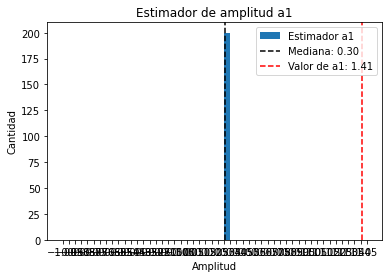

In [14]:
#%% Estimador de apmlitud a1 para Flattop

a1_flattop = np.abs(fft_flattop[int(W0)])*2
a1_flattop_db = 10* np.log(a1_flattop**2/2)
mediana_a1_flattop = np.median(a1_flattop)
sesgo_a1_flattop = mediana_a1_flattop - a1
var_a1_flattop = np.var(a1_flattop)


plt.figure(4)
plt.title("Estimador de amplitud a1")
plt.xlabel("Amplitud")
plt.ylabel("Cantidad")
bins = np.arange(-1,1.5,.05 )
plt.hist(a1_flattop,label= 'Estimador a1', bins=bins);
plt.xticks(bins)
plt.xticks(bins)
plt.axvline(mediana_a1_flattop, color='black', linestyle='--', label=f'Mediana: {mediana_a1_flattop:.2f}')
plt.axvline(a1, color='red', linestyle='--', label=f'Valor de a1: {a1:.2f}')

#plt.hist(a1_flattop,label= 'flattop');
plt.legend(loc='upper right')

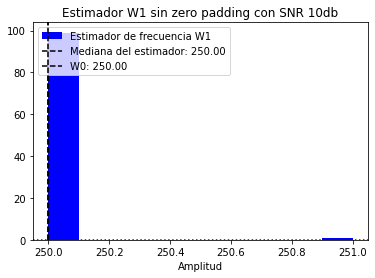

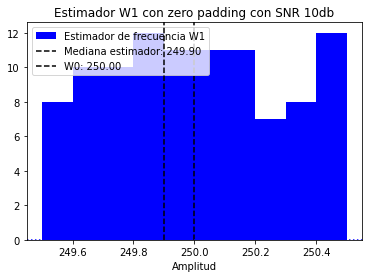

In [34]:
#%% Estimador de frecuencia Boxcar
#Sin Zero Padding
est_W_bc = ff[np.argmax(dp_sig_bc,axis=0)]
max_val = np.max(dp_sig_bc_dB,axis=0)
med_W_bc = np.median(est_W_bc)
sesgo_W_bc = med_W_bc - W0
var_W_bc = np.var(est_W_bc)

#Con Zero Padding
est_W_bc_zp = ffz[np.argmax(dp_sig_bc_zp,axis=0)]
max_val_bc_zp = np.max(dp_sig_bc_zp,axis=0)
med_W_bc_zp = np.median(est_W_bc_zp)
sesgo_W_bc_zp = med_W_bc_zp - W0
var_W_bc_zp = np.var(est_W_bc_zp)

plt.figure(6)
plt.title("Estimador W1 sin zero padding con SNR 10db")
plt.xlabel("Amplitud")
plt.hist( est_W_bc,  color='blue', label = 'Estimador de frecuencia W1')
plt.axvline(med_W_bc, color='black', linestyle='--', label=f'Mediana del estimador: {med_W_bc:.2f}',zorder = 10)
plt.axvline(W0, color='black', linestyle='--', label=f'W0: {W0:.2f}')
plt.legend(loc='upper left')
plt.axhline(0,  color='blue', linestyle=':', label='0dB')

plt.figure(7)
plt.title("Estimador W1 con zero padding con SNR 10db")
plt.xlabel("Amplitud")
plt.hist( est_W_bc_zp,  color='blue', label = 'Estimador de frecuencia W1')
plt.axvline(med_W_bc_zp, color='black', linestyle='--', label=f'Mediana estimador: {med_W_bc_zp:.2f}',zorder = 10)
plt.axvline(W0, color='black', linestyle='--', label=f'W0: {W0:.2f}')
plt.legend(loc='upper left')
plt.axhline(0,  color='blue', linestyle=':', label='0dB')
plt.show()

Repito análisis y comparo en graficas para snr 3db

In [23]:
a1 = np.sqrt(2) #Amplitud normalizada de la señal
nn = 1000       # Cantidad de muestras que tiene mi señal
rr = 100         # La cantidad de realizaciones que se hacen
fs=nn           # Igualo fs a nn para que deltaf =1 
Zpadding = 10      
df = fs/nn
Ts =  1 / fs    #   Me detengo en la mitad de la frecuencia de trabajo
W0 = fs / 4     #
snr = 3

###########Parametros de graficas de frecuencia
ff = np.linspace(0, (nn-1)*df, nn)
bfrec = ff <= fs/2
dfz = fs/Zpadding/nn
ffz = np.linspace(0, (Zpadding*nn-1)*dfz, Zpadding*nn)  # eje en frecuencia con zero padding
bfrecz = ffz <= fs/2 
#############

# fr = np.random.uniform(-1/2, 1/2, size = (1,rr))
fr = np.random.uniform(-1/2, 1/2, size = (1,rr))  # Genero la dispersión de frecuencias
W1 = W0 + fr    # cantidad de W1 igual a la cantidad de realizaciónes 
#W1 = W0 + 1/2


tt = np.arange(0, nn*Ts, Ts).reshape(nn,1)  # Defino el eje de tiempo para cada realización
tt2 = np.arange(0, 10*nn*Ts, Ts).reshape(10*nn,1) 

# Genero el ruido uniforme
Pn = 10**(-snr/10)
Vn = np.sqrt(Pn*12) 
Noise = np.random.uniform(-Vn/2, Vn/2, size = (nn,rr))


ttr =  tt * np.ones((nn,rr)) 
#Senoidal pura
xx = a1 * np.sin(W1*2*np.pi * ttr)

#Senoidal + Ruido
xr3 = xx + Noise

####Ventana
#####Boxcar - Ventana implicita####
wnBoxcar = sig.windows.boxcar(nn).reshape(nn,1) ##inicialmente decial 1 en vez de rr
XX_boxcar3 = xr3 * wnBoxcar
#Normalizo los valores de las señales con su ventana
#XX_boxcar = xxBox / np.sqrt(np.var(xxBox))  
#XX_boxcar = xxBox 
#####Flattop#####
wnFlattop = sig.windows.flattop(nn).reshape(nn,1) ##inicialmente decial 1 en vez de rr

#Normalizo los valores de las señales con su ventana
XX_flattop3 = xr3 * wnFlattop

#####Zero padding - Analisis para Boxcar
Xz_Boxcar3 = np.vstack([XX_boxcar3,np.zeros([(Zpadding-1)*nn,rr])])
#Zero padding - Analisis para Flattop
Xz_Flattop3 = np.vstack([XX_flattop3,np.zeros([(Zpadding-1)*nn,rr])])  

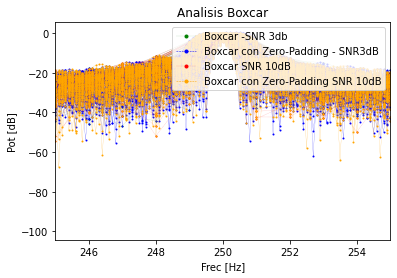

In [25]:
plt.figure(1)
#Con Zero padding
fft_boxcar_zp3   = np.fft.fft( Xz_Boxcar3,    axis = 0 )/nn
dp_sig_bc_zp3   = np.abs(fft_boxcar_zp3[bfrecz])**2
dp_sig_bc_zp_dB3 = 10* np.log10(2*dp_sig_bc_zp3)


#Sin Zero padding
fft_boxcar3   = np.fft.fft( XX_boxcar3,    axis = 0 )/nn
dp_sig_bc3  = np.abs(fft_boxcar3[bfrec])**2
dp_sig_bc_dB3  = 10* np.log10(2*dp_sig_bc3)

plt.title("Analisis Boxcar")
plt.xlabel("Frec [Hz]")
plt.ylabel("Pot [dB]")
plt.xlim(W0-5*df, W0+5*df)
plt.plot([],[], label="Boxcar -SNR 3db", color = 'green', linestyle=':',  linewidth=.2,  marker='o', markersize=3)
plt.plot( ff[bfrec], dp_sig_bc_dB3,  color = 'green',  linestyle=':',  linewidth=.2,  marker='o', markersize=1)
plt.plot([],[], label="Boxcar con Zero-Padding - SNR3dB", color = 'blue', linestyle='--', linewidth=.5, marker='o', markersize=3)
plt.plot( ffz[bfrecz], dp_sig_bc_zp_dB3,  color= 'blue', linestyle='--',  linewidth=.2,  marker='o', markersize=1)
plt.plot([],[], label="Boxcar SNR 10dB", color = 'red', linestyle=':',  linewidth=.2,  marker='o', markersize=3)
plt.plot( ff[bfrec], dp_sig_bc_dB,  color = 'red',  linestyle=':',  linewidth=.2,  marker='o', markersize=1)
plt.plot([],[], label="Boxcar con Zero-Padding SNR 10dB", color = 'orange', linestyle='--', linewidth=.5, marker='o', markersize=3)
plt.plot( ffz[bfrecz], dp_sig_bc_zp_dB,  color= 'orange', linestyle='--',  linewidth=.2,  marker='o', markersize=1)
plt.legend(loc='upper right')

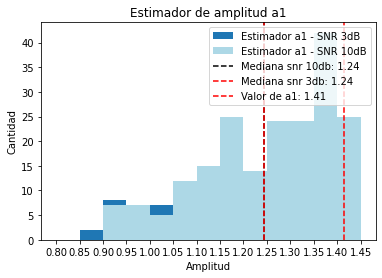

In [32]:
#%% Estimador de amplitud a1 Para Boxcar

a1_boxcar3 = np.abs(fft_boxcar3[int(W0)])*2
a1_boxcar_db3 = 10* np.log(a1_boxcar3**2/2)
mediana_a1_boxcar3 = np.median(a1_boxcar3)
sesgo_a1_boxcar3 = mediana_a1_boxcar3 - a1
var_a1_boxcar3 = np.var(a1_boxcar3)


plt.figure(3)
plt.title("Estimador de amplitud a1")
plt.xlabel("Amplitud")
plt.ylabel("Cantidad")
bins = np.arange(.8,1.5,.05 )
plt.hist(a1_boxcar3,label= 'Estimador a1 - SNR 3dB', bins=bins);
plt.xticks(bins)
plt.xticks(bins)
plt.hist(a1_boxcar,label= 'Estimador a1 - SNR 10dB',color='lightblue', bins=bins);
plt.axvline(mediana_a1_boxcar, color='black', linestyle='--', label=f'Mediana snr 10db: {mediana_a1_boxcar:.2f}')
plt.axvline(mediana_a1_boxcar, color='red', linestyle='--', label=f'Mediana snr 3db: {mediana_a1_boxcar3:.2f}')
plt.axvline(a1, color='red', linestyle='--', label=f'Valor de a1: {a1:.2f}')

#plt.hist(a1_flattop,label= 'flattop');
plt.legend(loc='upper right')

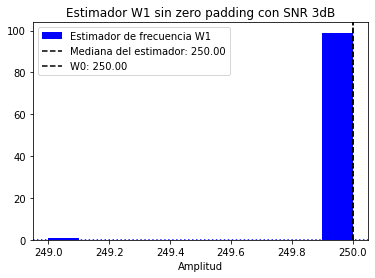

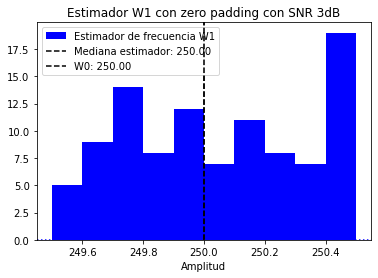

In [33]:
#%% Estimador de frecuencia Boxcar
#Sin Zero Padding
est_W_bc3 = ff[np.argmax(dp_sig_bc3,axis=0)]
max_val3 = np.max(dp_sig_bc_dB3,axis=0)
med_W_bc3 = np.median(est_W_bc)
sesgo_W_bc3 = med_W_bc3 - W0
var_W_bc3 = np.var(est_W_bc3)

#Con Zero Padding
est_W_bc_zp3 = ffz[np.argmax(dp_sig_bc_zp3,axis=0)]
max_val_bc_zp = np.max(dp_sig_bc_zp3,axis=0)
med_W_bc_zp3 = np.median(est_W_bc_zp3)
sesgo_W_bc_zp3 = med_W_bc_zp3 - W0
var_W_bc_zp3 = np.var(est_W_bc_zp3)

plt.figure(6)
plt.title("Estimador W1 sin zero padding con SNR 3dB")
plt.xlabel("Amplitud")
plt.hist( est_W_bc3,  color='blue', label = 'Estimador de frecuencia W1')
plt.axvline(med_W_bc3, color='black', linestyle='--', label=f'Mediana del estimador: {med_W_bc3:.2f}',zorder = 10)
plt.axvline(W0, color='black', linestyle='--', label=f'W0: {W0:.2f}')
plt.legend(loc='upper left')
plt.axhline(0,  color='blue', linestyle=':', label='0dB')

plt.figure(7)
plt.title("Estimador W1 con zero padding con SNR 3dB")
plt.xlabel("Amplitud")
plt.hist( est_W_bc_zp3,  color='blue', label = 'Estimador de frecuencia W1')
plt.axvline(med_W_bc_zp3, color='black', linestyle='--', label=f'Mediana estimador: {med_W_bc_zp3:.2f}',zorder = 10)
plt.axvline(W0, color='black', linestyle='--', label=f'W0: {W0:.2f}')
plt.legend(loc='upper left')
plt.axhline(0,  color='blue', linestyle=':', label='0dB')
plt.show()